# Linear Regression Prediction of Housing Prices

**Kenton Wong**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

An analysis of 100 house sales with 77 fields of data in order to create a linear regression model to predict future house sale prices. By determining correlation between the fields, we are able to make predictions with a certainty of R^2 = 0.83.

[Back to top](#Index)


## 1. Introduction


We must consider every variable when creating the model. Numeric data can be correlated easily, but non-numeric data must be transformed into separate dummy variables for each value. Fields with Zero and Error values must be studied to determine if these make sense or not: if not, they must be removed from consideration or transformed. The final model and R^2 value can be determined by using the most strongly correlated variables.

[Back to top](#Index)

## 2. The Data



[Back to top](#Index)

### 2.1 Import the Data



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data and set the index
data = pd.read_csv(r"C:\Users\Kenton\Desktop\HousingRegression\houseSmallData\houseSmallData.csv")
data.rename(columns = {'Unnamed: 0':'Index'}, inplace= True )
data.set_index('Index', inplace = True)
data.shape

(100, 81)

In [3]:
#investigate Sales Price
data['SalePrice'].head()

Index
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

[Back to top](#Index)

### 2.2 Data Exploration



(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

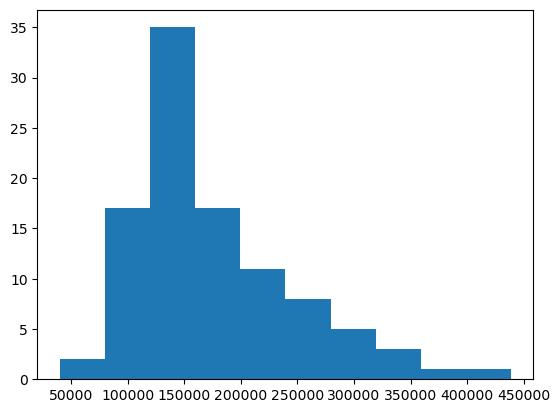

In [4]:
#plot histogram distribution of Sales Prices. We can observe a left skewed distribution.
plt.hist(data['SalePrice'])

In [5]:
#select numeric columns from data
numeric = data.select_dtypes(include=[np.number])
numeric.shape

(100, 39)

[Back to top](#Index)

### 2.3 Data Preparation



In [6]:
# Find zero values. If excessive zeroes and zero in that field doesn't make sense, either repair field or don't use field.
zeroes = pd.DataFrame(numeric.isin([0]).sum().sort_values(ascending = False))

zeroes[0:23]

,0
PoolArea,100
3SsnPorch,98
LowQualFinSF,98
ScreenPorch,95
BsmtHalfBath,93
MiscVal,91
BsmtFinSF2,91
EnclosedPorch,83
HalfBath,68
2ndFlrSF,65


In [7]:
# Find null values. Don't use fields with excessive null values, or repair null values.
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending = False))

nulls[0:18]

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
MasVnrType,60
FireplaceQu,54
LotFrontage,14
GarageType,6
GarageYrBlt,6
GarageFinish,6


In [8]:
#select non-numeric fields from data
non_num = data.select_dtypes(exclude=[np.number])
non_num_fields = list(non_num.columns.values)


In [9]:
#one-hot encoding
one_hot = pd.get_dummies(non_num[non_num_fields], dtype = int)
one_hot.shape

(100, 180)

In [10]:
#combine numeric with one-hot data
data_comb = numeric.join(one_hot)


[Back to top](#Index)

### 2.4 Correlation

Variables with the highest correlation will be a strong indicator for future Sales Prices.

In [11]:
#calculate correlation factor from sample data
corr = data_comb.corr()
corr['SalePrice'].sort_values(ascending=False)[0:6]


SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
BsmtQual_Ex    0.680094
GarageCars     0.663441
Name: SalePrice, dtype: float64

In [12]:
#index the most correlated fields
cols = corr['SalePrice'].sort_values(ascending=False)[0:5].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'BsmtQual_Ex'], dtype='object')


[Back to top](#Index)

## 3. Project Description


My analysis takes all fields into consideration regardless of data type. Through one-hot encoding we can even account for non-numeric fields. However, since non-numeric fields can only be assigned 0 or 1 values, most of the highly correlated fields were still numeric. This is no limit to the amount of fields we can use in linear regression, so my model will obtain a higher R^2 value given as the quantity of fields in the model increases.

[Back to top](#Index)

### 3.1 Linear Regression

Linear Regression: Y = X1B1 + X2B2 + X3B3 + ...

Linear Regression is used to predict the value of the dependent variable by using any number of independent variables multiplied by their respective correlation coefficients. 

In Python, we first calculate the correlation of each field using the corr() function. The fields with the highest correlation values are used to build the model. The sklearn library has the linear_model.LinearRegression() which can be used to easily build the predictions and R^2 value.

For this model, I am using 4 x-variables.

In [13]:
#pick out X columns and set Y = SalePrice for sample data
x = data_comb[cols]
y = data_comb['SalePrice']
x = x.drop(['SalePrice'], axis = 1)
x

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex
Index,,,,
0,7,1710,548,0
1,6,1262,460,0
2,7,1786,608,0
3,7,1717,642,0
4,8,2198,836,0
...,...,...,...,...
95,6,1470,420,0
96,7,1588,472,0
97,4,960,432,0


In [14]:
#build linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x,y)
predictions = model.predict(x)

In [15]:
#how good is the model
model.score(x,y)

0.8348832495099572

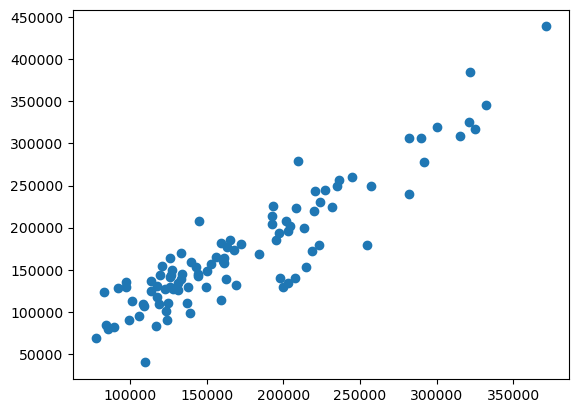

In [16]:
#scatter plot of predictions
plt.scatter(predictions, y)

[Back to top](#Index)

### 3.2 Analysis - attempt 2

Attempting the same process with 10 x-variables.

In [17]:
#calculate correlation factor from sample data
corr = data_comb.corr()
corr['SalePrice'].sort_values(ascending=False)[0:11]


SalePrice         1.000000
OverallQual       0.855061
GrLivArea         0.735129
GarageArea        0.688249
BsmtQual_Ex       0.680094
GarageCars        0.663441
YearBuilt         0.658636
TotalBsmtSF       0.616297
GarageYrBlt       0.603635
FireplaceQu_Gd    0.593375
FullBath          0.579505
Name: SalePrice, dtype: float64

In [18]:
cols2 = corr['SalePrice'].sort_values(ascending=False)[0:11].index
cols2

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'BsmtQual_Ex',
       'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt',
       'FireplaceQu_Gd', 'FullBath'],
      dtype='object')

In [19]:
#pick out X columns and set Y = SalePrice for sample data
xx = data_comb[cols2]
yy = data_comb['SalePrice']
xx = xx.drop(['SalePrice'], axis = 1)
xx

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FireplaceQu_Gd,FullBath
Index,,,,,,,,,,
0,7,1710,548,0,2,2003,856,2003.0,0,2
1,6,1262,460,0,2,1976,1262,1976.0,0,2
2,7,1786,608,0,2,2001,920,2001.0,0,2
3,7,1717,642,0,3,1915,756,1998.0,1,1
4,8,2198,836,0,3,2000,1145,2000.0,0,2
...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,0,2,1993,680,1993.0,0,2
96,7,1588,472,0,2,1999,1588,1999.0,0,2
97,4,960,432,0,1,1965,960,1965.0,0,1


In [20]:
#replace GarageYrBlt NaN values with the average
Avg_GarageYrBlt = data_comb['GarageYrBlt'].copy()
data_comb['GarageYrBlt'].fillna(Avg_GarageYrBlt.mean(),inplace=True)

In [21]:
#verify NaNs are replaced
xx = data_comb[cols2]
yy = data_comb['SalePrice']
xx = xx.drop(['SalePrice'], axis = 1)
xx

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FireplaceQu_Gd,FullBath
Index,,,,,,,,,,
0,7,1710,548,0,2,2003,856,2003.000000,0,2
1,6,1262,460,0,2,1976,1262,1976.000000,0,2
2,7,1786,608,0,2,2001,920,2001.000000,0,2
3,7,1717,642,0,3,1915,756,1998.000000,1,1
4,8,2198,836,0,3,2000,1145,2000.000000,0,2
...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,0,2,1993,680,1993.000000,0,2
96,7,1588,472,0,2,1999,1588,1999.000000,0,2
97,4,960,432,0,1,1965,960,1965.000000,0,1


In [22]:
#build linear regression model
from sklearn import linear_model
lr2 = linear_model.LinearRegression()
model2 = lr2.fit(xx,yy)
predictions2 = model2.predict(xx)


In [23]:
model2.score(xx,yy)

0.8882211708552957

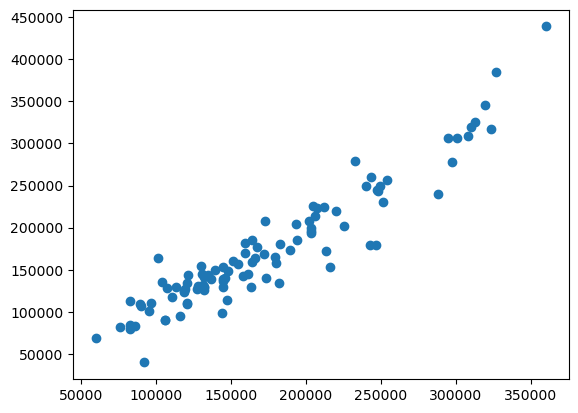

In [24]:
#scatter plot of predictions
plt.scatter(predictions2, yy)

[Back to top](#Index)

### 3.2.2 Analysis - attempt 3

Attempting the same process with 30 x-variables.

In [25]:
corr['SalePrice'].sort_values(ascending=False)[0:31]

SalePrice               1.000000
OverallQual             0.855061
GrLivArea               0.735129
GarageArea              0.688249
BsmtQual_Ex             0.680094
GarageCars              0.663441
YearBuilt               0.658636
TotalBsmtSF             0.616297
GarageYrBlt             0.603635
FireplaceQu_Gd          0.593375
FullBath                0.579505
MasVnrArea              0.571836
TotRmsAbvGrd            0.553603
1stFlrSF                0.550912
YearRemodAdd            0.548330
ExterQual_Gd            0.534426
Neighborhood_NridgHt    0.531920
KitchenQual_Gd          0.523343
Foundation_PConc        0.510722
HeatingQC_Ex            0.498890
LotArea                 0.497124
Fireplaces              0.487907
WoodDeckSF              0.451241
ExterQual_Ex            0.444999
GarageFinish_RFn        0.428851
Exterior1st_VinylSd     0.417298
Exterior2nd_VinylSd     0.417298
MasVnrType_Stone        0.406539
GarageType_BuiltIn      0.383678
2ndFlrSF                0.381076
Exterior1s

In [26]:
cols3 = corr['SalePrice'].sort_values(ascending=False)[0:31].index
cols3

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'BsmtQual_Ex',
       'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt',
       'FireplaceQu_Gd', 'FullBath', 'MasVnrArea', 'TotRmsAbvGrd', '1stFlrSF',
       'YearRemodAdd', 'ExterQual_Gd', 'Neighborhood_NridgHt',
       'KitchenQual_Gd', 'Foundation_PConc', 'HeatingQC_Ex', 'LotArea',
       'Fireplaces', 'WoodDeckSF', 'ExterQual_Ex', 'GarageFinish_RFn',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_Stone',
       'GarageType_BuiltIn', '2ndFlrSF', 'Exterior1st_WdShing'],
      dtype='object')

In [27]:
#pick out X columns and set Y = SalePrice for sample data
xxx = data_comb[cols3]
yyy = data_comb['SalePrice']
xxx = xxx.drop(['SalePrice'], axis = 1)
xxx

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FireplaceQu_Gd,FullBath,...,Fireplaces,WoodDeckSF,ExterQual_Ex,GarageFinish_RFn,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,GarageType_BuiltIn,2ndFlrSF,Exterior1st_WdShing
Index,,,,,,,,,,,,,,,,,,,,,
0,7,1710,548,0,2,2003,856,2003.000000,0,2,...,0,0,0,1,1,1,0,0,854,0
1,6,1262,460,0,2,1976,1262,1976.000000,0,2,...,1,298,0,1,0,0,0,0,0,0
2,7,1786,608,0,2,2001,920,2001.000000,0,2,...,1,0,0,1,1,1,0,0,866,0
3,7,1717,642,0,3,1915,756,1998.000000,1,1,...,1,0,0,0,0,0,0,0,756,0
4,8,2198,836,0,3,2000,1145,2000.000000,0,2,...,1,192,0,1,1,1,0,0,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,0,2,1993,680,1993.000000,0,2,...,1,232,1,0,1,1,0,1,790,0
96,7,1588,472,0,2,1999,1588,1999.000000,0,2,...,0,158,0,1,1,1,0,0,0,0
97,4,960,432,0,1,1965,960,1965.000000,0,1,...,0,120,0,0,0,0,0,0,0,0


In [28]:
#build linear regression model
from sklearn import linear_model
lr3 = linear_model.LinearRegression()
model3 = lr3.fit(xxx,yyy)
predictions3 = model3.predict(xxx)


In [29]:
model3.score(xxx,yyy)

0.9340473709995312

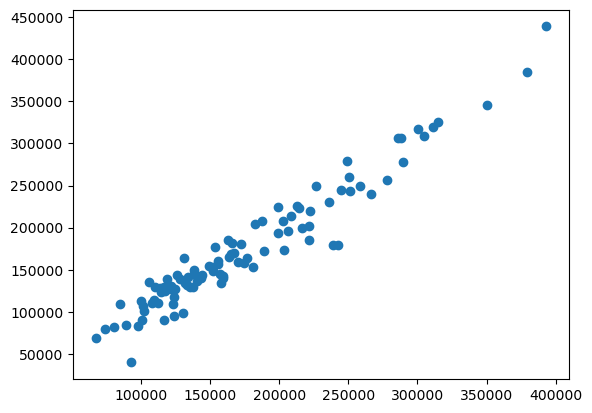

In [30]:
#scatter plot of predictions
plt.scatter(predictions3, yyy)

[Back to top](#Index)

### 3.3 Results


The 4-variable model returned a score of 0.83, the 10-variable model returned a score of 0.89, and the 30-variable model returned a score of 0.93. The more variable are used, the less that the model has to guess, and therefore results in a higher score.

[Back to top](#Index)

### 3.4.1 Verify Your Model Against Test Data



In [31]:
test = pd.read_csv(r"C:\Users\Kenton\Desktop\HousingRegression\jtest\jtest.csv")
test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [32]:
test_numeric = test.select_dtypes(include=[np.number])

In [33]:
#select non-numeric fields from data
test_non_num = test.select_dtypes(exclude=[np.number])
test_non_num_fields = list(test_non_num.columns.values)


In [34]:
test_one_hot = pd.get_dummies(test_non_num[test_non_num_fields], dtype = int)

In [35]:
test_data_comb = test_numeric.join(test_one_hot)

In [36]:
tx = test_data_comb[cols]
ty = tx['SalePrice']
tx = tx.drop(['SalePrice'], axis = 1)
tx

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex
0,6,1610,480,0
1,6,1732,476,0
2,5,1535,410,0
3,7,1226,740,0
4,7,1818,240,0
...,...,...,...,...
95,6,1456,440,0
96,7,1726,786,1
97,8,3112,795,0
98,6,2229,0,0


In [37]:
#replace GarageYrBlt NaN values with the average
test_Avg_GarageYrBlt = test_data_comb['GarageYrBlt'].copy()
test_data_comb['GarageYrBlt'].fillna(Avg_GarageYrBlt.mean(),inplace=True)

In [38]:
tx = test_data_comb[cols]
ty = tx['SalePrice']
tx = tx.drop(['SalePrice'], axis = 1)
tx

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex
0,6,1610,480,0
1,6,1732,476,0
2,5,1535,410,0
3,7,1226,740,0
4,7,1818,240,0
...,...,...,...,...
95,6,1456,440,0
96,7,1726,786,1
97,8,3112,795,0
98,6,2229,0,0


In [39]:
predictions = model.predict(tx)
print(f"R^2 is: {model.score(tx,ty)}")

R^2 is: 0.7864985465053953


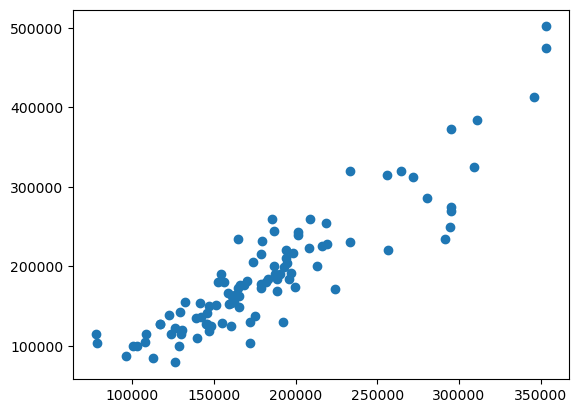

In [40]:
plt.scatter(predictions, ty)

[Back to top](#Index)

### 3.4.2 Verify Model 2 Against Test Data



In [41]:
tx2 = test_data_comb[cols2]
ty2 = tx2['SalePrice']
tx2 = tx2.drop(['SalePrice'], axis = 1)
tx2

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FireplaceQu_Gd,FullBath
0,6,1610,480,0,2,1977,1610,1977.000000,0,2
1,6,1732,476,0,2,1985,741,1985.000000,0,2
2,5,1535,410,0,2,1979,0,1979.000000,0,2
3,7,1226,740,0,3,2009,1226,2009.000000,0,2
4,7,1818,240,0,1,1931,1040,1951.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
95,6,1456,440,0,2,1976,855,1976.000000,0,2
96,7,1726,786,1,3,2007,1726,2007.000000,1,2
97,8,3112,795,0,2,1918,1360,1918.000000,0,2
98,6,2229,0,0,0,1912,755,1977.361702,0,1


In [42]:
predictions2 = model2.predict(tx2)
print(f"R^2 is: {model2.score(tx2,ty2)}")

R^2 is: 0.772778006788124


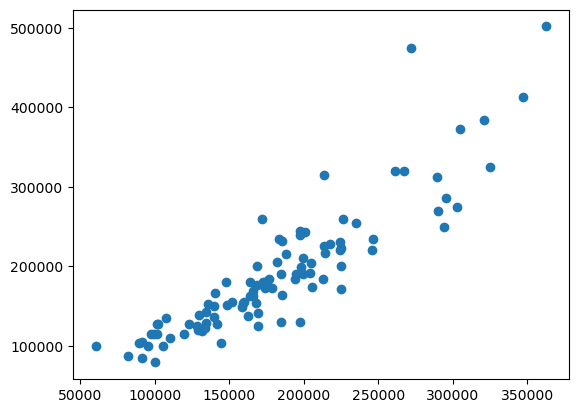

In [43]:
plt.scatter(predictions2, ty2)

[Back to top](#Index)

### 3.4.3 Verify Model 3 Against Test Data



In [44]:
tx3 = test_data_comb[cols3]
ty3 = tx3['SalePrice']
tx3 = tx3.drop(['SalePrice'], axis = 1)
tx3

,OverallQual,GrLivArea,GarageArea,BsmtQual_Ex,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FireplaceQu_Gd,FullBath,...,Fireplaces,WoodDeckSF,ExterQual_Ex,GarageFinish_RFn,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,GarageType_BuiltIn,2ndFlrSF,Exterior1st_WdShing
0,6,1610,480,0,2,1977,1610,1977.000000,0,2,...,2,168,0,1,0,0,0,0,0,0
1,6,1732,476,0,2,1985,741,1985.000000,0,2,...,1,192,0,0,0,0,0,0,755,0
2,5,1535,410,0,2,1979,0,1979.000000,0,2,...,0,0,0,0,0,0,0,0,0,0
3,7,1226,740,0,3,2009,1226,2009.000000,0,2,...,0,0,0,1,1,1,0,0,0,0
4,7,1818,240,0,1,1931,1040,1951.000000,0,1,...,2,0,0,0,0,0,0,0,592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1456,440,0,2,1976,855,1976.000000,0,2,...,1,87,0,0,0,0,0,0,601,0
96,7,1726,786,1,3,2007,1726,2007.000000,1,2,...,1,171,1,0,0,0,1,0,0,0
97,8,3112,795,0,2,1918,1360,1918.000000,0,2,...,1,0,0,0,0,0,0,0,1360,0
98,6,2229,0,0,0,1912,755,1977.361702,0,1,...,0,0,0,0,0,0,0,0,929,0


In [45]:
predictions3 = model3.predict(tx3)
print(f"R^2 is: {model3.score(tx3,ty3)}")

R^2 is: 0.7669567535630057


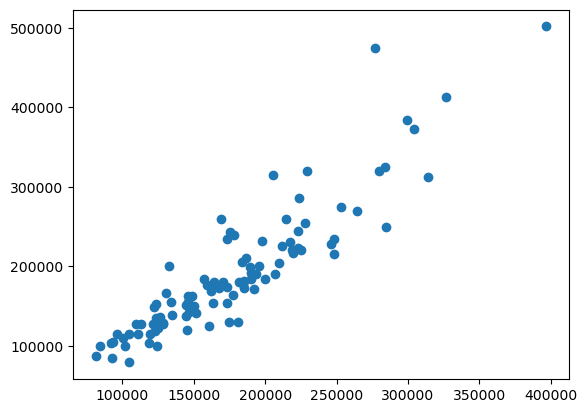

In [46]:
plt.scatter(predictions3, ty3)

[Back to top](#Index)

## Conclusion



When using the test data, we observe that the values change as follows:

4-variable model: 0.83 -> 0.78

10-variable model: 0.89 -> 0.77

30-variable model: 0.93 -> 0.76

Originally, more variables resulted in a higher score. However, this is only because the model was used against the same data that built it.

Including more variables actually resulted in a lower R^2 value when applying the model to new data. This is because using more variables incorporates weighting that may not hold true from entry to entry. The values dropped, but not by much. We should still aim to mitigate this and only incorporate variables that fall above a specified correlation value.

Data analysis can be very tricky when trying to predict the future. We can always build perfect tools to show what happened in the past, but we must be careful to select the right model, conditions, and variables when trying to make assumptions about the future.


[Back to top](#Index
)
## References

GfG, L. (2024, March 21). One hot encoding in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/ml-one-hot-encoding/ 
Mali, Kavita. “Everything You Need to Know about Linear Regression!” Analytics Vidhya, 23 Jan. 2024, www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/.
